In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve

In [2]:
# ======================== Data Loading and Exploration ========================
data = pd.read_excel('/content/diabetes-vid.xlsx')

# Convert categorical labels to numeric for binary classification
data['Outcome'] = data['Outcome'].map({'dead':0, 'alive':1})

# Split data into training and test set
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

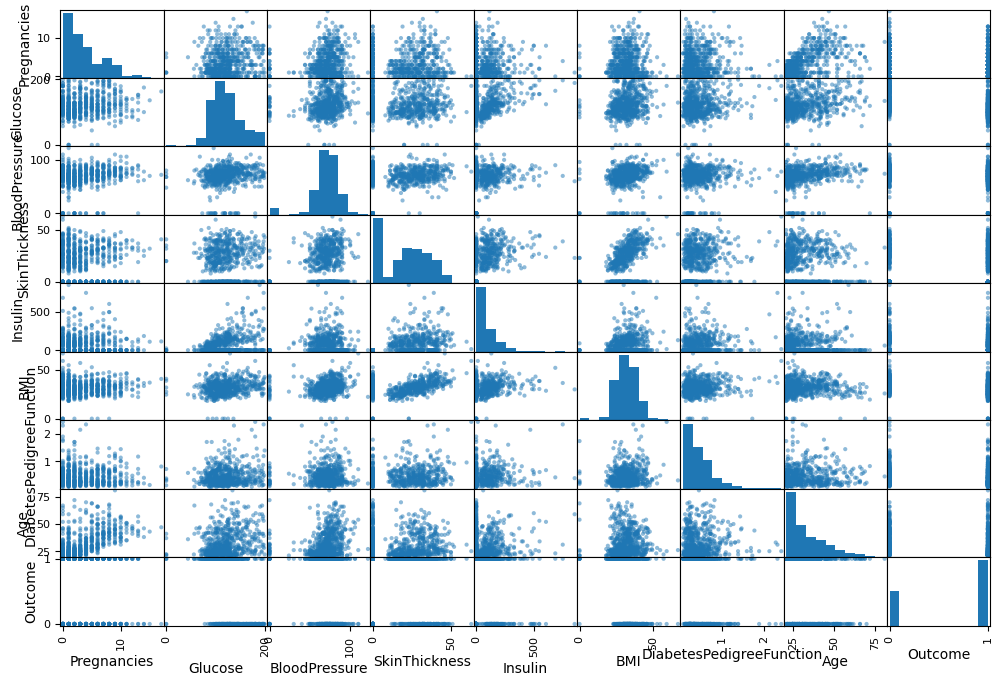

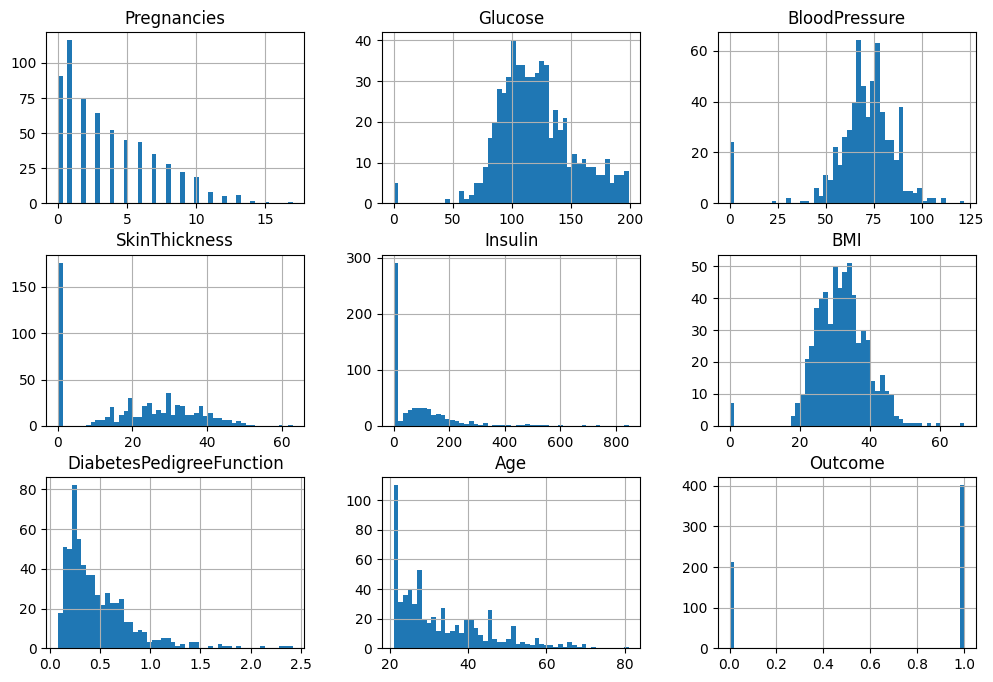

In [5]:
# ======================== Data Visualization ========================
def visualize_data(data):
    scatter_matrix(data, figsize=(12,8))
    plt.show()
    data.hist(bins=50, figsize=(12,8))
    plt.show()

visualize_data(train_set)

In [6]:
# ======================== Data Preprocessing ========================
X_train = train_set.drop('Outcome', axis=1)
y_train = train_set['Outcome']

def preprocess_data(X):
    pipeline = Pipeline([
        ('scaler', StandardScaler())
    ])
    preprocessing = ColumnTransformer([
        ('scaling', pipeline, X.columns)
    ], remainder='passthrough')
    return preprocessing.fit_transform(X)

X_train_scaled = preprocess_data(X_train)

In [7]:
# ======================== Model Training ========================
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train_scaled, y_train)

# Quick prediction test on first 5 samples
predicted_labels = sgd.predict(X_train_scaled[:5])
for i, label in enumerate(predicted_labels):
    print(f"Sample {i+1} predicted label: {label}")

Sample 1 predicted label: 1
Sample 2 predicted label: 0
Sample 3 predicted label: 1
Sample 4 predicted label: 0
Sample 5 predicted label: 1


Cross-validation scores: [0.74193548 0.72580645 0.80645161 0.75806452 0.60655738 0.81967213
 0.75409836 0.60655738 0.70491803 0.70491803]
Confusion Matrix:
[[120  93]
 [ 77 324]]
Precision: 77.70%
Recall: 80.80%
F1 Score: 79.22%


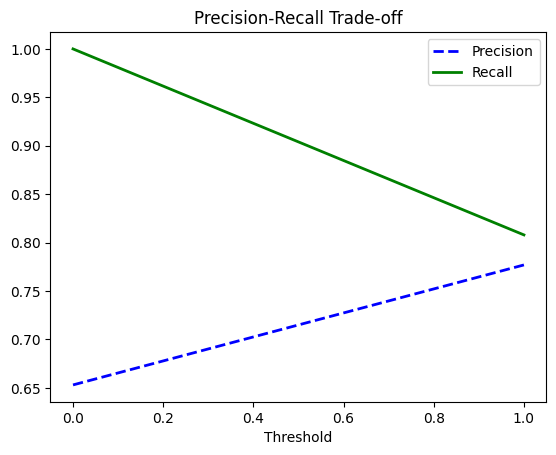

In [8]:
# ======================== Model Evaluation ========================
def evaluate_model(model, X, y, cv=10):
    # Cross-validation scores
    scores = cross_val_score(model, X, y, cv=cv, scoring="accuracy")
    print(f"Cross-validation scores: {scores}")

    # Confusion matrix
    y_pred = cross_val_predict(model, X, y, cv=cv)
    cm = confusion_matrix(y, y_pred)
    print(f"Confusion Matrix:\n{cm}")

    # Precision, Recall, and F1 Score
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    print(f"Precision: {precision*100:.2f}%")
    print(f"Recall: {recall*100:.2f}%")
    print(f"F1 Score: {f1*100:.2f}%")

    # Precision-Recall curve
    precisions, recalls, thresholds = precision_recall_curve(y, y_pred)
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel('Threshold')
    plt.legend()
    plt.title('Precision-Recall Trade-off')
    plt.show()

evaluate_model(sgd, X_train_scaled, y_train)
